In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet("modelHistoryAggregate.pq")
# print(df.columns)
df

,EncoderActivation,EncoderLossWeighting,TargetClasses,LatentDimension,Epochs,TotalLoss,DecoderLoss,EncoderLoss,TotalValidationLoss,DecoderValidationLoss,EncoderValidationLoss
0,sigmoid,0.000,"[0, 1]",16,10,0.011452,0.011452,3.749050e-01,0.011314,0.011314,3.756445e-01
1,sigmoid,0.002,"[0, 1]",16,10,0.012899,0.012455,2.224095e-01,0.012686,0.012236,2.249879e-01
2,sigmoid,0.004,"[0, 1]",16,10,0.013728,0.013135,1.483833e-01,0.013352,0.012758,1.483566e-01
3,sigmoid,0.006,"[0, 1]",16,10,0.015528,0.014853,1.125418e-01,0.015232,0.014554,1.128783e-01
4,sigmoid,0.008,"[0, 1]",16,10,0.015522,0.014662,1.075867e-01,0.015014,0.014156,1.073247e-01
...,...,...,...,...,...,...,...,...,...,...,...
2448,tanh,0.048,"[0, 1]",64,10,0.063331,0.063331,1.442621e-07,0.063116,0.063116,7.796513e-08
2449,tanh,0.050,"[0, 1]",64,10,0.025512,0.024100,2.822632e-02,0.025201,0.023708,2.986541e-02
2450,tanh,0.000,"[0, 1]",128,10,0.008762,0.008762,1.567429e+00,0.008651,0.008651,1.574951e+00
2451,tanh,0.002,"[0, 1]",128,10,0.010771,0.010272,2.498264e-01,0.010720,0.010224,2.482058e-01


In [3]:
df = df.groupby(["EncoderActivation", "TargetClasses", "Epochs", "EncoderLossWeighting", "LatentDimension"]) \
    .aggregate(["mean", "sem"]) \
    .reset_index()
df

EncoderActivation TargetClasses Epochs EncoderLossWeighting  \
                                                                  
0             sigmoid        [0, 1]     10                0.000   
1             sigmoid        [0, 1]     10                0.000   
2             sigmoid        [0, 1]     10                0.000   
3             sigmoid        [0, 1]     10                0.002   
4             sigmoid        [0, 1]     10                0.002   
..                ...           ...    ...                  ...   
151              tanh        [0, 1]     10                0.048   
152              tanh        [0, 1]     10                0.048   
153              tanh        [0, 1]     10                0.050   
154              tanh        [0, 1]     10                0.050   
155              tanh        [0, 1]     10                0.050   

    LatentDimension TotalLoss           DecoderLoss           EncoderLoss  \
                         mean       sem        mean       sem        mean   
0                16  0.011445  0.000048    0.011445  0.000048    0.373997   
1                64  0.010009  0.000046    0.010009  0.000046    0.359783   
2               128  0.009816  0.000057    0.009816  0.000057    0.335896   
3                16  0.012660  0.000085    0.012211  0.000092    0.224960   
4                64  0.011060  0.000070    0.010737  0.000074    0.161916   
..              ...       ...       ...         ...       ...         ...   
151              64  0.039492  0.003820    0.038723  0.003952    0.016017   
152             128  0.022391  0.000552    0.021344  0.000592    0.021812   
153              16  0.059432  0.002163    0.059297  0.002237    0.002695   
154              64  0.034568  0.003649    0.033438  0.003802    0.022602   
155             128  0.024118  0.002113    0.023069  0.002174    0.020982   

              TotalValidationLoss           DecoderValidationLoss            \
          sem                mean       sem                  mean       sem   
0    0.001117            0.011274  0.000047              0.011274  0.000047   
1    0.001842            0.009947  0.000039              0.009947  0.000039   
2    0.002622            0.009697  0.000057              0.009697  0.000057   
3    0.003999            0.012454  0.000096              0.012002  0.000102   
4    0.002511            0.010906  0.000071              0.010583  0.000075   
..        ...                 ...       ...                   ...       ...   
151  0.002966            0.039456  0.003810              0.038672  0.003945   
152  0.000870            0.022135  0.000574              0.021090  0.000612   
153  0.001486            0.059314  0.002161              0.059164  0.002242   
154  0.003242            0.034249  0.003676              0.033112  0.003829   
155  0.001293            0.023814  0.002118              0.022757  0.002178   

    EncoderValidationLoss            
                     mean       sem  
0                0.376076  0.001159  
1                0.361246  0.001800  
2                0.335726  0.002766  
3                0.226177  0.003897  
4                0.161392  0.002510  
..                    ...       ...  
151              0.016342  0.003019  
152              0.021761  0.000829  
153              0.002999  0.001694  
154              0.022750  0.003263  
155              0.021143  0.001258  

[156 rows x 17 columns]

In [4]:
LATENT_DIMENSIONS_VALS = df["LatentDimension"].unique()
LATENT_DIMENSIONS_VALS.sort()

ENCODER_LOSS_WEIGHTINGS_VALS = df["EncoderLossWeighting"].unique()
ENCODER_LOSS_WEIGHTINGS_VALS.sort()

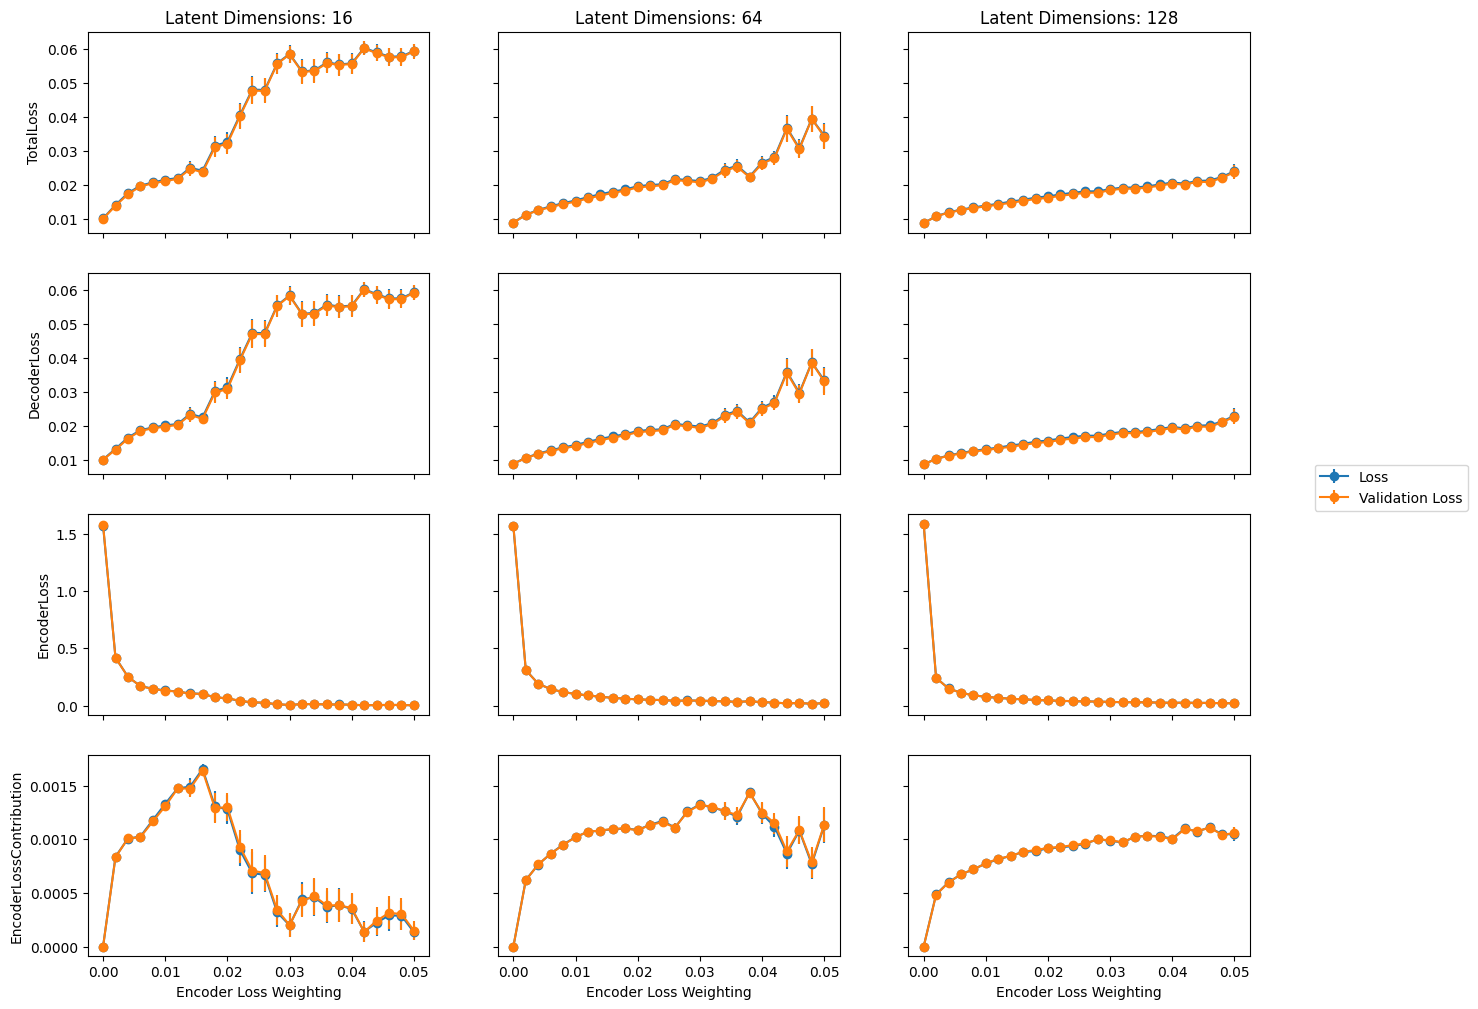

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=len(LATENT_DIMENSIONS_VALS), figsize=(15,12), sharex=True, sharey="row")
basedf = df[(df["EncoderActivation"]=="tanh") & (df["TargetClasses"]=="[0, 1]")]

for latentDim, ax in zip(LATENT_DIMENSIONS_VALS, np.ravel(axes[0,:])):
    targetdf = basedf[basedf["LatentDimension"]==latentDim]

    targetcol = basedf[basedf["LatentDimension"]==latentDim]["TotalLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"], fmt="o-", label="Loss")
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["TotalValidationLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"], fmt="o-", label="Validation Loss")

for latentDim, ax in zip(LATENT_DIMENSIONS_VALS, np.ravel(axes[1,:])):
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["DecoderLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"], fmt="o-",)
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["DecoderValidationLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"], fmt="o-",)

for latentDim, ax in zip(LATENT_DIMENSIONS_VALS, np.ravel(axes[2,:])):
    targetdf = basedf[basedf["LatentDimension"]==latentDim]
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["EncoderLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"], fmt="o-",)
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["EncoderValidationLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"], fmt="o-",)

for latentDim, ax in zip(LATENT_DIMENSIONS_VALS, np.ravel(axes[3,:])):
    targetdf = basedf[basedf["LatentDimension"]==latentDim]
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["EncoderLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetdf["EncoderLossWeighting"]*targetcol["mean"], targetdf["EncoderLossWeighting"]*targetcol["sem"], fmt="o-",)
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["EncoderValidationLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetdf["EncoderLossWeighting"]*targetcol["mean"], targetdf["EncoderLossWeighting"]*targetcol["sem"], fmt="o-",)


for latentDim, ax in zip(LATENT_DIMENSIONS_VALS, np.ravel(axes[0,:])):
    ax.set_title(f"Latent Dimensions: {latentDim}")

axes[0, 0].set_ylabel("TotalLoss")
axes[1, 0].set_ylabel("DecoderLoss")
axes[2, 0].set_ylabel("EncoderLoss")
axes[3, 0].set_ylabel("EncoderLossContribution")

for ax in np.ravel(axes[-1, :]):
    ax.set_xlabel("Encoder Loss Weighting")

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.05,0.5))

# plt.tight_layout()
plt.show()